In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import re, string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
dataframe_o3 = pd.read_csv("../data/raw/ticket-o3.csv", usecols = ['titolo','messaggio','categoria'])
dataframe_gc = pd.read_csv("../data/raw/ticket-gemini-claude.csv", usecols = ['titolo','messaggio','categoria'])

In [15]:
dataframe = pd.concat([dataframe_o3,dataframe_gc])
dataframe.drop_duplicates(inplace=True)
print(dataframe)

                                         titolo  \
0                                  Login Errore   
1                         Modifica Dati Profilo   
2                     Assistenza Sistema Scuola   
3               Errore Prenotazione Ricevimento   
4                 Problema Visualizzazione Voti   
..                                          ...   
405        Problemi Tecnici - Piattaforma Lenta   
406              Sito Web - Problemi di Accesso   
407             Bug - Richiesta di Informazioni   
408  Assistenza Tecnica - Richiesta di Contatto   
409       Microfono - Problemi di Registrazione   

                                             messaggio   categoria  
0    Buongiorno, sto riscontrando un problema con i...     Accesso  
1    Salve, ho notato che i miei dati di contatto n...     Profilo  
2    Buonasera, utilizzo regolarmente la piattaform...   Didattica  
3    Gentile team, ho provato a prenotare un appunt...  Segreteria  
4    Buongiorno, durante la consultazione 

In [16]:
x=dataframe['categoria'].value_counts()
print(x)

categoria
Segreteria    765
Didattica     666
Accesso       356
Profilo       332
Tecnico       248
Name: count, dtype: int64


<Axes: xlabel='categoria', ylabel='count'>

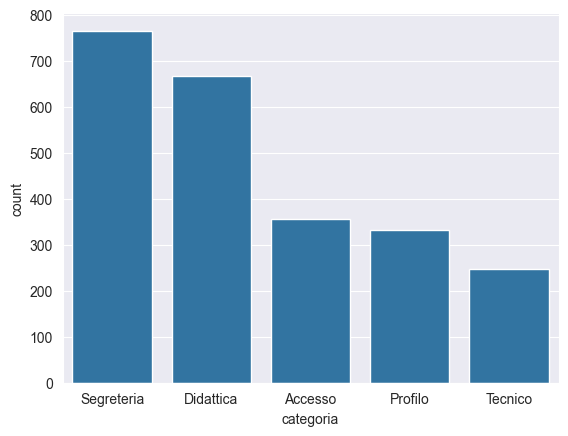

In [17]:
sns.barplot(x)

In [18]:
frame = dataframe['titolo'] + dataframe['messaggio']
print(frame)

0      Login ErroreBuongiorno, sto riscontrando un pr...
1      Modifica Dati ProfiloSalve, ho notato che i mi...
2      Assistenza Sistema ScuolaBuonasera, utilizzo r...
3      Errore Prenotazione RicevimentoGentile team, h...
4      Problema Visualizzazione VotiBuongiorno, duran...
                             ...                        
405    Problemi Tecnici - Piattaforma LentaLa piattaf...
406    Sito Web - Problemi di AccessoNon riesco ad ac...
407    Bug - Richiesta di InformazioniHo segnalato un...
408    Assistenza Tecnica - Richiesta di ContattoVorr...
409    Microfono - Problemi di RegistrazioneNon riesc...
Length: 2367, dtype: object


In [19]:
dataframe['titolo_messaggio'] = dataframe['titolo'] + ' ' + dataframe['messaggio']
frame = dataframe[['titolo_messaggio', 'categoria']]
print(frame)

                                      titolo_messaggio   categoria
0    Login Errore Buongiorno, sto riscontrando un p...     Accesso
1    Modifica Dati Profilo Salve, ho notato che i m...     Profilo
2    Assistenza Sistema Scuola Buonasera, utilizzo ...   Didattica
3    Errore Prenotazione Ricevimento Gentile team, ...  Segreteria
4    Problema Visualizzazione Voti Buongiorno, dura...   Didattica
..                                                 ...         ...
405  Problemi Tecnici - Piattaforma Lenta La piatta...     Tecnico
406  Sito Web - Problemi di Accesso Non riesco ad a...     Tecnico
407  Bug - Richiesta di Informazioni Ho segnalato u...     Tecnico
408  Assistenza Tecnica - Richiesta di Contatto Vor...     Tecnico
409  Microfono - Problemi di Registrazione Non ries...     Tecnico

[2367 rows x 2 columns]


In [20]:
train_set, test_set = train_test_split(dataframe, random_state=42, test_size=0.2)
print(train_set.shape, test_set.shape)

(1893, 4) (474, 4)


NameError: name 'frame' is not defined